In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
#myby=xr.open_dataset("watlev.my.int.50pctile.ssp370.nc")
##myby=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/slr/watlev.my.hig.50pctile.ssp245.nc")

In [3]:
#10/28/2024 try new file
myby=xr.open_dataset("watlev.my.int.50pctile.ssp370.wv2.nc")

In [4]:
myby.head()

ens1 = myby.sel(ensemble=0) 

In [5]:
# myby.variables



ens1_wlast = myby.sel(ensemble=0).wl_ast.values
ens2_wlast = myby.sel(ensemble=1).wl_ast.values

print(ens1_wlast)
print(ens2_wlast)

[-0.804 -0.612 -0.372 ...  0.147 -0.401 -0.892]
[-0.804 -0.612 -0.372 ...  0.147 -0.401 -0.892]


In [6]:
#myby.sel(time=slice("2000-01-01", "2000-01-02"))
myby.time

<xarray.DataArray 'time' (nt: 1323648)>
[1323648 values with dtype=datetime64[ns]]
Dimensions without coordinates: nt
Attributes:
    long_name:  Time

In [7]:
print(myby.modelno[1].values)

2


In [8]:
# print(myby.sel(modelno=1))

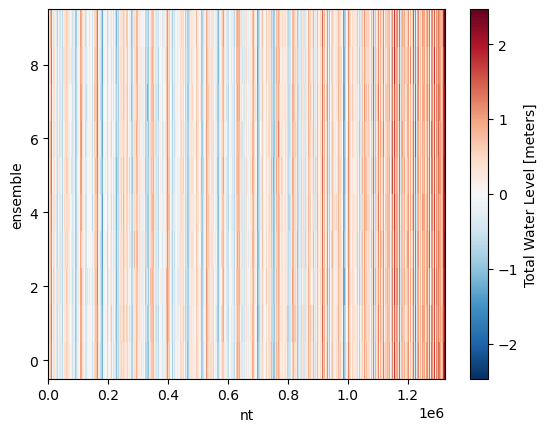

In [9]:
myby['wl_tot'][0:10].plot()

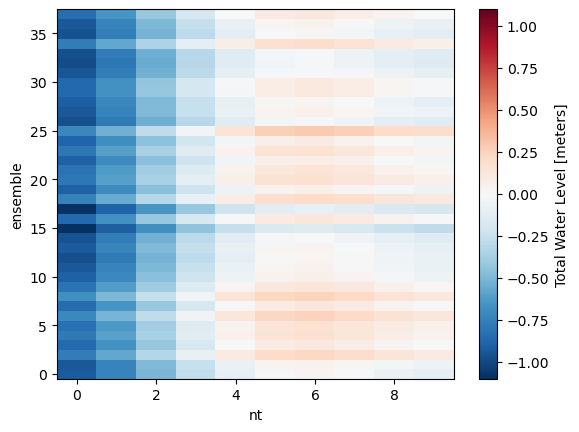

In [10]:
myby['wl_tot'][:,0:10].plot()

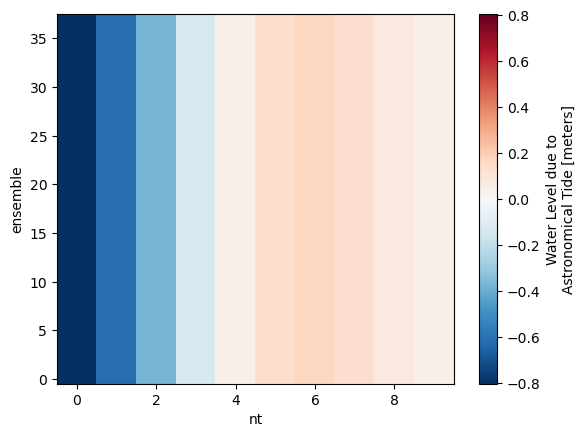

In [11]:
myby['wl_ast'][:,0:10].plot()

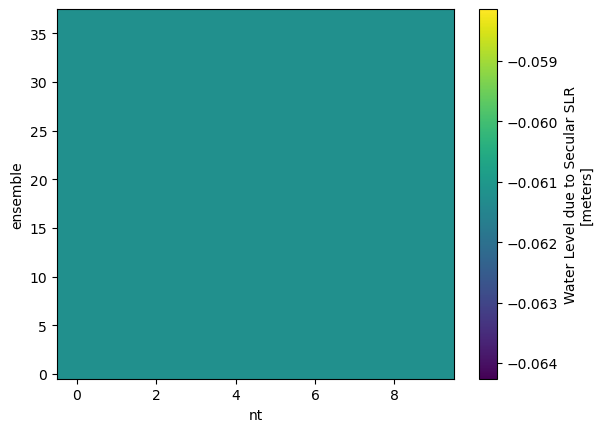

In [12]:
myby['wl_slr'][:,0:10].plot()

In [13]:
#myby2=xr.open_dataset("watlev.my.low.50pctile.ssp370.nc")
myby2=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/slr/watlev.my.low.50pctile.ssp370.nc")

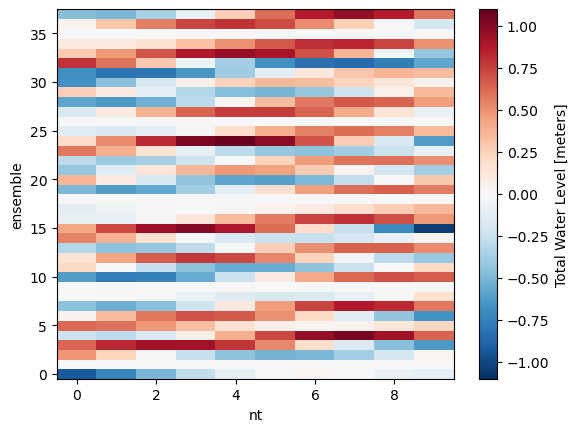

In [14]:
myby2['wl_tot'][:,0:10].plot()

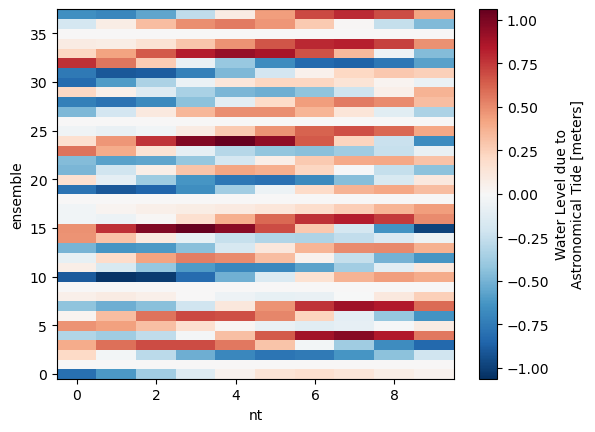

In [15]:
myby2['wl_ast'][:,0:10].plot()

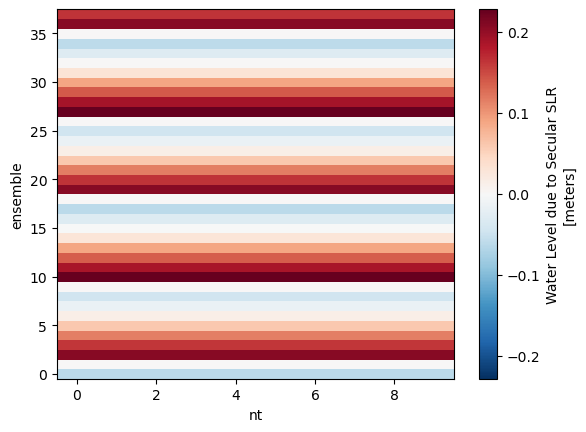

In [16]:
myby2['wl_slr'][:,0:10].plot()

In [17]:
print(myby['time'][0].values)

1950-01-01T00:00:00.000000000


In [18]:
print(myby['realization'])

<xarray.DataArray 'realization' (ensemble: 38)>
array([ 1,  1,  1,  4,  1,  2,  3,  4,  1,  1,  2,  3,  4,  5,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10,  1,  2,  3,  1,  2,  3,  4,  5, 10,  1,  2,  3,
        4,  5], dtype=int32)
Dimensions without coordinates: ensemble
Attributes:
    long_name:  realization number from variant label


In [19]:
myby.set_coords(('time','modelno','realization'))

<xarray.Dataset>
Dimensions:         (ensemble: 38, nt: 1323648)
Coordinates:
    modelno         (ensemble) int32 ...
    realization     (ensemble) int32 1 1 1 4 1 2 3 4 1 1 ... 3 4 5 10 1 2 3 4 5
    time            (nt) datetime64[ns] ...
Dimensions without coordinates: ensemble, nt
Data variables:
    initialization  (ensemble) int32 ...
    physics         (ensemble) int32 ...
    forcing         (ensemble) int32 ...
    wl_tot          (ensemble, nt) float32 ...
    wl_ast          (ensemble, nt) float32 ...
    wl_slr          (ensemble, nt) float32 ...
    wl_metslp       (ensemble, nt) float32 ...
    wl_metsst       (ensemble, nt) float32 ...
    wl_metn34       (ensemble, nt) float32 ...
    wl_metwnd       (ensemble, nt) float32 ...
Attributes:
    tide_station:               Monterey
    NOAA_station_number:        9413450
    station_latitude:           36.608N
    station_longitude:          121.892W
    emission_scenario:          ssp370
    slr_scenario:               Intermediate
    slr_percentile_projection:  50th Percentile
    slr_reference_line1:        California Sea Level Rise Guidance:
    slr_reference_line2:          2024 Science and Policy Update. 2024.
    history:                    Created on Sun Oct 20 10:01:44 2024 PST 
    author:                     Sam Iacobellis (sam@ucsd.edu)

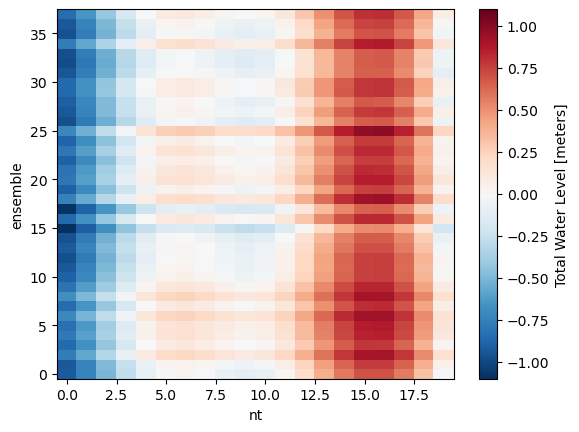

In [20]:
#myby.sel(time='1950-01-01T00:00:00.000000000')
myby.isel(nt=slice(0, 20))['wl_tot'].plot()

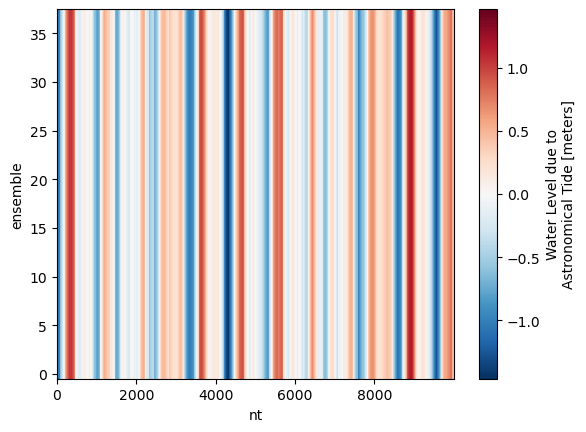

In [21]:
myby.isel(nt=slice(0, 10000))['wl_ast'].plot()

In [22]:
myby.isel(ensemble=slice(0, 1000))

<xarray.Dataset>
Dimensions:         (ensemble: 38, nt: 1323648)
Dimensions without coordinates: ensemble, nt
Data variables: (12/13)
    modelno         (ensemble) int32 ...
    realization     (ensemble) int32 1 1 1 4 1 2 3 4 1 1 ... 3 4 5 10 1 2 3 4 5
    initialization  (ensemble) int32 ...
    physics         (ensemble) int32 ...
    forcing         (ensemble) int32 ...
    time            (nt) datetime64[ns] ...
    ...              ...
    wl_ast          (ensemble, nt) float32 ...
    wl_slr          (ensemble, nt) float32 ...
    wl_metslp       (ensemble, nt) float32 ...
    wl_metsst       (ensemble, nt) float32 ...
    wl_metn34       (ensemble, nt) float32 ...
    wl_metwnd       (ensemble, nt) float32 ...
Attributes:
    tide_station:               Monterey
    NOAA_station_number:        9413450
    station_latitude:           36.608N
    station_longitude:          121.892W
    emission_scenario:          ssp370
    slr_scenario:               Intermediate
    slr_percentile_projection:  50th Percentile
    slr_reference_line1:        California Sea Level Rise Guidance:
    slr_reference_line2:          2024 Science and Policy Update. 2024.
    history:                    Created on Sun Oct 20 10:01:44 2024 PST 
    author:                     Sam Iacobellis (sam@ucsd.edu)

In [23]:
myby.ensemble[23].values

array(23)

In [24]:
myby.realization.values

array([ 1,  1,  1,  4,  1,  2,  3,  4,  1,  1,  2,  3,  4,  5,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  1,  2,  3,  4,  5, 10,  1,
        2,  3,  4,  5], dtype=int32)

In [25]:
myby.realization

<xarray.DataArray 'realization' (ensemble: 38)>
array([ 1,  1,  1,  4,  1,  2,  3,  4,  1,  1,  2,  3,  4,  5,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10,  1,  2,  3,  1,  2,  3,  4,  5, 10,  1,  2,  3,
        4,  5], dtype=int32)
Dimensions without coordinates: ensemble
Attributes:
    long_name:  realization number from variant label

In [26]:
myby.isel(ensemble=slice(0, 1000)).modelno.values

array([ 1,  2,  3,  3,  4,  4,  4,  4,  5,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11], dtype=int32)

In [27]:
myby.isel(nt=slice(0, 1000)).modelno.values

array([ 1,  2,  3,  3,  4,  4,  4,  4,  5,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11], dtype=int32)

In [28]:
myby.time.values

array(['1950-01-01T00:00:00.000000000', '1950-01-01T01:00:00.000000000',
       '1950-01-01T02:00:00.000000000', ...,
       '2100-12-31T21:00:00.000000000', '2100-12-31T22:00:00.000000000',
       '2100-12-31T23:00:00.000000000'], dtype='datetime64[ns]')